In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support, f1_score, precision_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
australia_forecast = pd.read_csv('australia.csv')

In [3]:
print(australia_forecast.keys()) #patrze jakie sa nagłówki

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [4]:
australia_forecast[australia_forecast["RainTomorrow"] == 0].describe()  #próbuje zobczyć jak bardzo różni się dzien w
                                                                        #w którym nie pada jutro a ten gdzie pada

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.0
mean,13.166611,24.765538,1.182149,5.758525,8.641254,39.224877,15.296343,19.384857,63.207306,44.714023,1018.175237,1015.637006,3.760075,3.779806,18.268420,23.377392,0.152729,0.0
std,6.368581,6.902305,4.617274,3.796570,3.338099,12.174093,8.065273,8.234055,18.363871,17.847462,6.549944,6.544964,2.767432,2.583256,6.557603,6.722703,0.359730,0.0
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,982.900000,983.200000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.0
25%,8.400000,19.300000,0.000000,3.000000,6.700000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.700000,1011.000000,1.000000,1.000000,13.300000,18.100000,0.000000,0.0
50%,13.000000,24.600000,0.000000,5.200000,9.500000,37.000000,15.000000,19.000000,64.000000,46.000000,1018.000000,1015.500000,3.000000,3.000000,17.900000,23.100000,0.000000,0.0
75%,18.000000,30.100000,0.200000,7.800000,11.000000,46.000000,20.000000,24.000000,76.000000,58.000000,1022.500000,1020.100000,7.000000,6.000000,23.300000,28.500000,0.000000,0.0
max,31.400000,48.100000,182.600000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,0.0


In [5]:
australia_forecast[australia_forecast["RainTomorrow"] == 1].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.0
mean,14.520286,22.285129,5.487302,4.599026,4.529597,46.727368,16.980204,21.209624,75.314959,66.905931,1013.926909,1011.816834,5.946729,6.261930,17.980309,20.348869,0.462139,1.0
std,6.475014,6.866919,11.553907,3.155133,3.390385,15.453586,9.031452,9.284455,15.746792,18.449353,7.127063,7.163316,2.163760,1.840983,6.599997,6.712269,0.498585,0.0
min,-4.700000,7.000000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,5.000000,1.000000,980.500000,977.100000,0.000000,0.000000,-0.100000,4.300000,0.000000,1.0
25%,9.200000,16.800000,0.000000,2.200000,1.400000,35.000000,11.000000,15.000000,66.000000,55.000000,1009.300000,1007.000000,5.000000,6.000000,12.600000,14.900000,0.000000,1.0
50%,14.000000,21.400000,0.800000,4.000000,4.300000,44.000000,15.000000,20.000000,77.000000,68.000000,1013.800000,1011.600000,7.000000,7.000000,17.300000,19.600000,0.000000,1.0
75%,19.900000,27.800000,5.800000,6.400000,7.200000,56.000000,22.000000,28.000000,88.000000,81.000000,1018.600000,1016.500000,7.000000,7.000000,23.200000,25.400000,1.000000,1.0
max,29.800000,46.800000,206.200000,43.000000,13.900000,122.000000,65.000000,65.000000,100.000000,100.000000,1039.500000,1036.000000,8.000000,8.000000,36.400000,46.100000,1.000000,1.0


Z pierwszych obserwacji nasuwa się wniosek, że kolmuny "Rainfall", "Humidity*" maja większe wyniki dla dni desczowych co nie powinno dziwić. Podobnie kolumna "Sunshine" średnio ma wiekszy wynik w dni, w które nie pada. Interesujace jest natoamist fakt, że ciśnienie jest niższe gdy jest deszcz oraz to, że "WindGustSpeed" czyli krótkie porywiste wiatry maja zdycydwaonie wyższy wpsóczynnik niż dla dni słoniecznych.

In [6]:
australia_forecast.info() # info zevy sprawdzić czy faktycznie nigdzie nie ma nulli

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

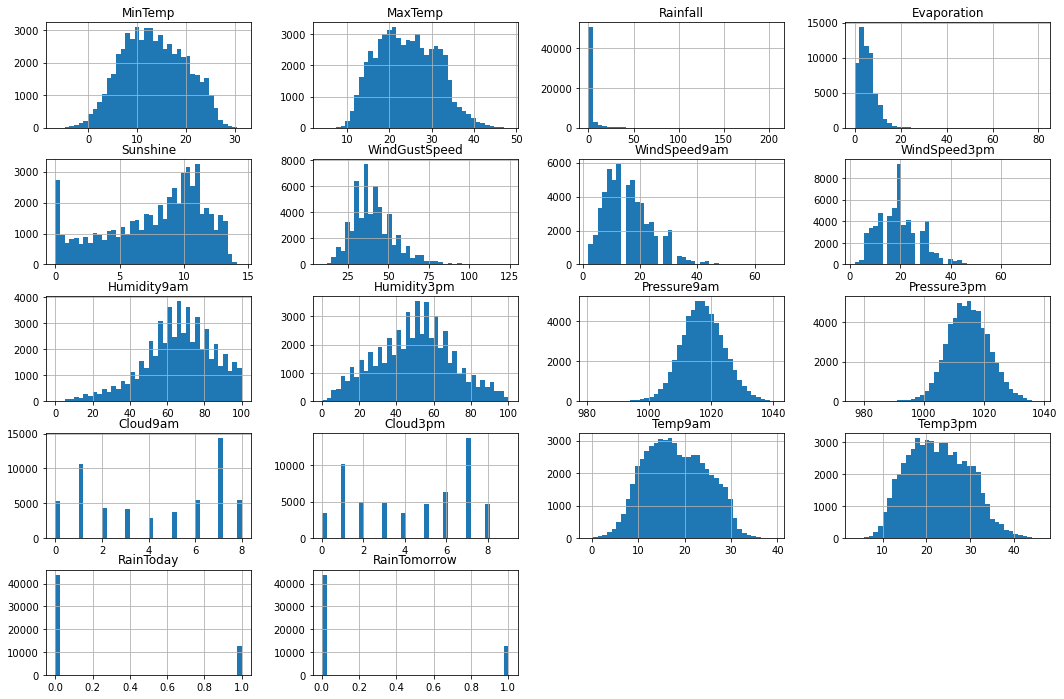

In [7]:
australia_forecast.hist(bins = 40, figsize=(18, 12)) #pare wykresów porównawczych, żeby wiedzieć z czym mamy doczynienia
                                                     #jest sporo wykresów przypominających rozkład normalny
plt.show()

In [8]:
australia_forecast.shape #teraz bedziemy przygotowywac dane do zbirów, patrzymy najpierw ile mamy rekordow, poto 
                         #żeby wiedzieć jaki podzial przyjąc

(56420, 18)

In [9]:
y = np.array(australia_forecast['RainTomorrow']) #target
X = australia_forecast.drop(['RainTomorrow'],axis=1) #features

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) #przyjąlem strategie 70 : 15: 15
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Zacznijmy od czegos prostego, bo może nie ma co się trudzić jak prote roziwaznia będą zadowalące. Skorzysatmy z Dumy. Cięzko tu mówić o jakimś tuningownaniu prametrów, ale wybrana przeze mnie strategia to "prior".

In [11]:
dc = DummyClassifier(strategy='prior', random_state=42)
dc.fit(X_train,y_train)
y_hat = dc.predict(X_val)
print('accuracy: ', accuracy_score(y_test, y_hat))

accuracy:  0.7752570010634526


Super! jak na dummy to dobry wynik. W sumie można by skończyć na tym. No ale to jest "accuracy". Zobaczmy co jest dla innych metryk i wyświetlmy confusion matrix

In [12]:
print("recall: ", recall_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

recall:  0.0
f1:  0.0


array([[6561,    0],
       [1902,    0]])

No to raczej chyba to nie jest dobry model. Wszytko klasyfikuje jako dni bez deszczu, a nie o to chodzi. ALe obserwacaj ta pozawala wysunuc, że mamy niezbalasnowane klasy. Można to było juz zauważyć przy wyświetlaniu descirbe, ale zbaczmy to teraz dla naszych zbirów

In [13]:
print(f"Trening: DESZCZ {sum(y_train == 1)},\
SŁOŃCE {sum(y_train == 0)} PROCENTOWO {sum(y_train == 1)/sum(y_train == 0)}\n")

print(f"Walidacja: DESZCZ {sum(y_val == 1)},\
SŁOŃCE {sum(y_val == 0)} PROCENTOWO {sum(y_val == 1)/sum(y_val == 0)}\n")

print(f"Test: DESZCZ {sum(y_test == 1)},\
SŁOŃCE {sum(y_test == 0)} PROCENTOWO {sum(y_test == 1)/sum(y_test == 0)}")


Trening: DESZCZ 8657,SŁOŃCE 30837 PROCENTOWO 0.2807341829620261

Walidacja: DESZCZ 1868,SŁOŃCE 6595 PROCENTOWO 0.28324488248673235

Test: DESZCZ 1902,SŁOŃCE 6561 PROCENTOWO 0.28989483310470965


We wszytkich przypadkach mamy stabline niezrównoważenie. Około 3 razy wiececj mamy rekordow z dniami słonecznymi

# Logistic Regression

In [14]:
modelLR = LogisticRegression(random_state=42)
modelLR.fit(X_train, y_train)
y_hat = modelLR.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)


accuracy:  0.8519437551695617
recall:  0.5278654048370137
precision:  0.7387785136129507
f1:  0.6157620361852193


array([[6206,  355],
       [ 898, 1004]])

Dodajmy teraz wagi do klas. Zalecane jest "1/liczba rekordow w danej klasie". Jest to pierwszy paramter jaki dodajemy.

In [15]:
n = sum(y_train == 0)
m = sum(y_train == 1)

modelLR = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000, class_weight= {0: 1/n , 1: 1/m})
modelLR.fit(X_train, y_train)
y_hat = modelLR.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

accuracy:  0.7978258300838946
recall:  0.7828601472134595
precision:  0.5342662360961608
f1:  0.6351034335679249


array([[5263, 1298],
       [ 413, 1489]])

Widać, że jest duzo lepiej, choć f1 score wciaż jest niski. Ale za to recall i accuracy sa podobne do siebie i całkiem wysokie. Kolejnym nasuwającym się paramterem byłby learing rate, ale scikit-learn implemetuje regresje logistyczna tak zwanym Stochastic Average Gradient, któty tego nie wymaga. Wiec nastepnym krokiem będzie regularyzacja. Wybieram "L2" i bede dobierał współczynnik C

In [16]:
def bestC():
    n = sum(y_train == 0)
    m = sum(y_train == 1)
    coff = [0.01, 0.1, 0.3, 1.0, 5.0, 10.0, 20.0]
    best = 0
    Cbest = 0
    
    for el in coff:
        modelLR = LogisticRegression(C= el, penalty='l2', random_state=42, n_jobs=-1, max_iter=1000, class_weight= {0: 1/n , 1: 1/m})
        modelLR.fit(X_train, y_train)
        y_val_hat = modelLR.predict(X_val)
        f1 = f1_score(y_val, y_val_hat)
        if f1 > best:
            best = f1
            Cbest = el
    return el

In [17]:
C = bestC()

Wysatwimy teraz obiczone C. Doadtkowo trochę zmienciłem wsółczczynnik przy wagach, poniewaz podaczas trenowania, zauwazałem, że zamiana go w klasie "0" na 1.5/n daje nam propraw metryki f1 i podwyzsza również precison 

In [18]:
n = sum(y_train == 0)
m = sum(y_train == 1)

modelLR = LogisticRegression(C= C, penalty='l2', random_state=42, n_jobs=-1, max_iter=1000, class_weight= {0: 1.5/n , 1: 1/m})
modelLR.fit(X_train, y_train)
y_hat = modelLR.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

accuracy:  0.8305565402339596
recall:  0.7050473186119873
precision:  0.6056910569105691
f1:  0.6516034985422742


array([[5688,  873],
       [ 561, 1341]])

Widzimy, że regularyzacja troche nam pomogła

# XGBoost

In [19]:
modelXGB =XGBClassifier(random_state=42,
                    eval_metric="logloss")
                    #max_depth domyslnie 6
                    #learning_rate domyslnie 0.3
                        
modelXGB.fit(X_train, y_train)
y_hat = modelXGB.predict(X_test)

print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

accuracy:  0.8554885974240813
recall:  0.5609884332281808
precision:  0.7333333333333333
f1:  0.6356866249627643


array([[6173,  388],
       [ 835, 1067]])

Funcja bestmodel wybiera najlepszy learing rate, scale_pos_weigh, wybranie booster = "dart" pozwala nam dodac rate_drop, który ma podobne działanie jak droput, dodałem do modelu również reg_lambda, ale ustwiłem ją domyślnie na 1. Co wiecej fuckacja jest dosyc potęzna i nie wiem czy az 4 pętle były dorym pomysłem, szczególnie, że wiele wartosci na pewno nie poprawa modelu wiec zakres wybrany przeze mnie był prawdopodonie za duży. Stąd te funkcej wywołałem w innym śrdowsku: Google Colab

In [20]:
def bestmodel(n, m, k):
    alphas = np.logspace(n, 0, m)
    coff = list(np.arange(1,1.8,0.1))
    l3 = len(coff)
    coff2 = [0.0,0.1,0.2,0.3]
    l4 = len(coff2)
    s = []
    score = 0
    lr = 0
    h = 0
    l1 = sum(y_train == 0)
    l2 = sum(y_train == 1)
    for el in alphas:
        for i in range(1, k+1):
            for el1 in coff:
                for j in range(l4):
                    model=XGBClassifier(random_state=1,
                        learning_rate= el,  
                        booster='dart', 
                        max_depth= i,
                        scale_pos_weight = l1/(el1*l2),
                        eval_metric="logloss",
                        rate_drop = coff2[j],                
                        use_label_encoder=False)

                    model.fit(X_train, y_train)
                    y_val_hat = model.predict(X_val)
                    scoref1 = f1_score(y_val, y_val_hat)
                    scorea = accuracy_score(y_val, y_val_hat)
                    scorer = recall_score(y_val, y_val_hat)
                    s1 = [scoref1, scorea, scorer]
                    s.append(s1)
                    if scoref1 > score:
                        score = scoref1
                        lr = el
                        h = i
                        c1 = el1
                        c2 = coff2[j]
    return score, lr, h, c1, c2, s
        

In [21]:
n = sum(y_train == 0)
m = sum(y_train == 1)

modelXGB=XGBClassifier(random_state=42,
                    learning_rate= 0.15,
                    max_depth= 9,
                    booster = "dart",
                    reg_lambda = 1,
                    scale_pos_weight = n/(1.2*m),
                    eval_metric="logloss",
                    rate_drop = 0.0,
                    use_label_encoder=False)

modelXGB.fit(X_train, y_train)
y_hat = modelXGB.predict(X_test)

print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

accuracy:  0.8474536216471701
recall:  0.7181913774973712
precision:  0.644035832154644
f1:  0.6790952025851354


array([[5806,  755],
       [ 536, 1366]])

# Vote

In [32]:
model2 = modelXGB
model1 = modelLR
estimators=[('XGB', model2), ('LR', model1)]

In [40]:
model_soft = VotingClassifier(estimators= estimators, voting='soft', weights = [0.9, 0.5])
model_soft.fit(X_train, y_train)

y_hat = model_soft.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_hat))
print("recall: ", recall_score(y_test, y_hat))
print("precision: ", precision_score(y_test, y_hat))
print("f1: ", f1_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

accuracy:  0.848398912915042
recall:  0.722397476340694
precision:  0.6453734147487084
f1:  0.68171669560903


array([[5806,  755],
       [ 528, 1374]])

Widzimy, że otrzymaliśmy najlepszy dotąd z trenownaych modeli. Dlasza rzecz, która moglibyśmy zrobic to teraz przejżeć i zrozumieć dlaczego model popelnia błędy. W tym celu możemy wyświetlić te rekordy, które sprawiały błedy. W dlaszej cześci zadania nie będę już robił tej analizy, lecz jest to dalszy proces jaki bym robil aby polepszyć model

In [44]:
a = y_hat - y_test
X_test[a==-1].describe()#dane źle sklasyfikane

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,14.392045,24.231439,1.826136,5.276136,7.351515,40.799242,15.573864,20.602273,66.761364,50.914773,1016.310985,1013.853788,4.778409,4.884470,18.854167,22.890530,0.196970
std,6.804983,6.668362,5.749773,3.567958,3.075359,12.393510,8.362871,8.697147,15.462382,14.203132,6.468944,6.563399,2.442925,2.245786,6.781800,6.524345,0.398086
min,-3.300000,11.200000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,15.000000,9.000000,992.100000,989.600000,0.000000,0.000000,3.400000,10.100000,0.000000
25%,9.000000,19.000000,0.000000,2.800000,5.475000,31.000000,9.000000,15.000000,58.000000,42.000000,1011.975000,1009.200000,2.000000,3.000000,13.575000,17.900000,0.000000
50%,13.700000,23.600000,0.000000,4.800000,8.000000,39.000000,15.000000,20.000000,67.500000,52.500000,1016.400000,1013.900000,5.500000,6.000000,18.300000,22.400000,0.000000
75%,19.625000,29.925000,0.400000,6.800000,9.700000,46.500000,20.000000,26.000000,76.000000,61.000000,1020.625000,1018.100000,7.000000,7.000000,23.625000,28.300000,0.000000
max,28.200000,43.500000,50.600000,43.000000,13.300000,91.000000,52.000000,65.000000,100.000000,84.000000,1036.600000,1034.200000,8.000000,8.000000,34.400000,41.700000,1.000000


In [45]:
X_test[a==1].describe() #dane źle sklasyfikane

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,14.878013,22.469801,4.171126,4.318146,4.440397,45.735099,17.170861,21.512583,75.943046,65.182781,1014.756954,1012.774040,6.119205,6.368212,18.086490,20.702649,0.422517
std,6.326970,6.604754,8.859214,2.852739,2.820759,14.173565,9.221052,8.859546,14.218201,13.370698,6.905189,7.066179,1.912985,1.475547,6.493743,6.444624,0.494287
min,-2.500000,8.800000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,16.000000,12.000000,988.800000,988.100000,0.000000,0.000000,3.500000,7.300000,0.000000
25%,9.600000,17.100000,0.000000,2.200000,2.000000,35.000000,11.000000,15.000000,67.000000,58.000000,1010.100000,1007.900000,6.000000,6.000000,12.800000,15.700000,0.000000
50%,14.300000,21.800000,0.400000,3.800000,4.500000,44.000000,15.000000,20.000000,77.000000,66.000000,1014.700000,1012.600000,7.000000,7.000000,17.300000,19.700000,0.000000
75%,20.150000,27.650000,4.300000,6.000000,6.700000,54.000000,22.000000,28.000000,87.000000,74.000000,1019.250000,1016.950000,7.000000,7.000000,23.250000,25.850000,1.000000
max,28.500000,45.800000,113.000000,16.000000,12.000000,113.000000,50.000000,59.000000,100.000000,98.000000,1033.400000,1033.100000,8.000000,8.000000,32.600000,44.700000,1.000000


In [46]:
X_test[a==0].describe() # dane dobrze sklasyfikowane 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000,7180.000000
mean,13.342354,24.390641,2.055334,5.631504,8.083008,40.238440,15.622423,19.491922,64.912256,48.059471,1017.482925,1014.982173,4.066992,4.061560,18.180042,22.908315,0.203343
std,6.406182,6.945828,7.325796,3.795222,3.711712,13.042217,8.243013,8.483562,18.667883,20.489842,6.877960,6.839564,2.820457,2.667558,6.554236,6.809006,0.402513
min,-5.800000,7.500000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,6.700000,0.000000
25%,8.500000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,54.000000,33.000000,1013.000000,1010.300000,1.000000,1.000000,13.100000,17.500000,0.000000
50%,13.200000,24.200000,0.000000,5.000000,9.100000,39.000000,15.000000,19.000000,66.000000,48.000000,1017.400000,1014.900000,4.000000,4.000000,17.800000,22.700000,0.000000
75%,18.200000,29.800000,0.400000,7.600000,10.900000,48.000000,20.000000,24.000000,78.000000,61.000000,1022.000000,1019.600000,7.000000,7.000000,23.200000,28.100000,0.000000
max,29.200000,45.100000,182.600000,81.200000,13.900000,107.000000,63.000000,63.000000,100.000000,100.000000,1040.200000,1036.900000,8.000000,8.000000,37.200000,44.100000,1.000000
